# IMP.pmi Tutorial Handout

### Integrating EM and Crosslinking data to localize two domains of RNA Polymerase II

Authors: Riccardo Pellarin, Charles Greenberg, Daniel Saltzberg, Ben Webb

The Python Modeling Interface (pmi) is a powerful set of tools designed
to handle all steps of the modeling protocol for
typical modeling problems. It is designed to be used by writing a set of
Python scripts.

IMP.pmi has been used to determine the architecture of several macromolecular complexes, for instance:

[26S-PIP](https://salilab.org/26S-PIPs), [Yeast 40S-eIF3](https://salilab.org/40S-eIF1-eIF3), [Human Complement](https://salilab.org/Complement), [exosome](https://salilab.org/exosome),
    [yeast mediator](https://salilab.org/mediator/), [Nup84](https://salilab.org/nup84), [TFIIH](https://salilab.org/tfiih), [Nup82](https://salilab.org/nup82/), [SEA complex](https://salilab.org/sea), and the [Nuclear Pore Complex](https://salilab.org/npc2018)
    
Each repository above contains the scripts and the data, as well as all the results, that are needed to reproduce the published results. 

For a given system, integrative modeling files are stored in different servers:

- source code is stored in a github repository (e.g., https://github.com/integrativemodeling/npc2018) 
- data files are stored in the Zenodo data server (e.g., https://zenodo.org/record/1194547#.W02gVq3v5UQ)
- structures are stored in the pdb-dev server (e.g., https://pdb-dev.wwpdb.org/)

We will illustrate the use of IMP.pmi by determining the localization of two
subunits of RNA Polymerase II, utilizing chemical cross-linking coupled with
mass spectrometry, negative-stain electron microscopy (EM), and x-ray
crystallography data. We will try
to reconstruct the stalk of the complex, comprising of subunits Rpb4 and Rpb7,
hypothesizing that we know already the structure of the remaining 10-subunit
complex. The example can be easily generalized to any other set of subunits.

## Installation

The current version of the Tutorial is still under development, and it is guaranteed to work with IMP commit version [72e58be](https://github.com/salilab/imp/tree/72e58be984e6cda52ea726c2d4e6228e7d80a0cd), and IMP.pmi commit version [b7101c2](https://github.com/salilab/pmi/tree/b7101c2d80e575cdbdf6e28100d5a1ce4387a71b)

To work through the example on your own system, you will need the following
packages installed in addition to [IMP itself](https://integrativemodeling.org/nightly/doc/manual/installation.html):

- [numpy and scipy](http://www.scipy.org/scipylib/download.html)
  for matrix and linear algebra

- [scikit-learn](http://scikit-learn.org/stable/install.html)
  for k-means clustering

- [matplotlib](http://matplotlib.org/downloads.html)
  for plotting results

- [Chimera](https://www.cgl.ucsf.edu/chimera/download.html)
  for visualization of results

(If you are using [Anaconda Python](https://store.continuum.io/cshop/anaconda/),
you can get the Python packages above by simply running
`conda install numpy scipy scikit-learn matplotlib`.
On a Mac you can get them using the
[pip](https://pypi.python.org/pypi/pip) tool, e.g. by running a command like
`sudo easy_install pip`, then install the packages with something like
`sudo pip install scikit-learn; sudo pip install matplotlib`. `numpy` and `scipy` are already installed on modern Macs. Something
similar may also work on a Linux box, although it's probably better to install
the packages using the distribution's package manager, such as `yum` or
`apt-get`.)

Then download the input files, either by 
[cloning the GitHub repository](https://github.com/salilab/imp_tutorial/tree/develop)
or by [downloading the zip file](https://github.com/salilab/imp_tutorial/archive/develop.zip).

The rnapolii example directory contains three directories: `analysis`, `data`, and `modeling`.

## Table of Content

[//]: # (To compile the Table of Content run `python tools/compile_toc.py Tutorial.ipynb` and paste the output here below)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[ Background of RNA Polymerase II ](#3_Background_of_RNA_Polymerase_II)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[ Integrative Modeling using IMP ](#4_Integrative_Modeling_using_IMP)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[ The four stages of Integrative Modeling ](#3_The_four_stages_of_Integrative_Modeling)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[ Running the script ](#3_Running_the_script)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[ Stage 1 - Gathering of data ](#Stage_1_2)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[ Data for yeast RNA Polymerase II ](#Data_rnapolii_3)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[ Stage 2 - Representation of subunits and translation of the data into spatial restraints ](#Stage_2_2)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[ Setting up Model Representation and Degrees of Freedom in IMP ](#Setting_up_3)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[ Hierarchy ](#Hierarchy_3)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[ Dissecting the script ](#Dissecting_the_script_3)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[ Model Representation Using a Topology File. ](#Topology_file_4)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[ Building the System Representation and Degrees of Freedom ](#Representation_and_DOF_4)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[ Scoring Function ](#Scoring_Function_3) 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[ Connectivity Restraint ](#Connectivity_Restraint_4) 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[ Excluded Volume Restraint ](#Excluded_Volume_Restraint_4) 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[ Crosslinks - dataset 1 ](#Crosslink_1_4)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[ Crosslinks - dataset 2 ](#Crosslink_2_4)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[ Electron Microscopy Restraint ](#EM_4) 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[ Stage 3 - Sampling ](#Sampling_2)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[ Modeling Output ](#Output_3)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[ Using `ProcessOutput` for inline analysis ](#ProcessOutput_3)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[ Stage 4 - Analysis Part 1 ](#Analysis_Part_1_2)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[ Precomputed results ](#Precomputed_Results_3)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[ Clustering top models using `clustering.py` ](#Clustering_3)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[ Clustering Results ](#Clustering_Results_3)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[ Stage 4 - Analysis Part 2 ](#Analysis_Part_2_2)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[ Post-clustering analysis ](#Post_clustering_analsysis_3)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[ Cluster Precision (`precision_rmsf.py`) ](#Cluster_Precision_3)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[ Accuracy evaluation (`accuracy.py`) ](#Accuracy_3)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[ Sampling Exhaustiveness ](#Sampling_Exhaustiveness_3)



## Background of RNA Polymerase II <a name="3_Background_of_RNA_Polymerase_II"></a>

[RNA Pol II](http://en.wikipedia.org/wiki/RNA_polymerase_II) is a eukaryotic complex that catalyzes DNA transcription to synthesize mRNA strands.  Eukaryotic RNA polymerase II contains 12 subunits, Rpb1 to Rpb12. The yeast RNA Pol II dissociates into a 10-subunit core and a Rpb4/Rpb7 heterodimer. Rpb4 and Rpb7 are conserved from yeast to humans, and form a stalk-like protrusion extending from the main body of the RNA Pol II complex.


### Integrative Modeling using IMP <a name="4_Integrative_Modeling_using_IMP"></a>

This example will use data from chemical cross linking, EM and x-ray crystallography to localize the two subunits of the RNA Polymerase II stalk (Rpb4, Rpb7) to a static core of the remaining ten subunits.  

<img src="files/images/rnapolii_integrative.png" alt="Drawing" style="width: 600px;"/>

### The four stages of Integrative Modeling <a name="3_The_four_stages_of_Integrative_Modeling"></a>

Structural modeling using IMP is divided into [four stages](@ref procedure).

Click the links below to see a breakdown of all the modeling steps.


* [Stage 1](#Stage_1_2)) Collect biophysical data that can be used as structural restraints and constraints
  
* [Stage 2](#Stage_2_2)) Define representations for the RNA Poly II structural model and define each data point as a scoring function.

* [Stage 3](#Sampling_2)) Run a sampling protocol to find good scoring conformations.  

* [Stage 4.1](#Analysis_Part_1_2), [Stage 4.2](#Analysis_Part_2_2)) Analysis of the good scoring conformations.  Clustering; uncertainty; precision; etc...

### Running the script <a name="3_Running_the_script"></a>

The first three modeling stages are all contained within one script, `modeling.py`. You can get started by simply changing into the `rnapolii/modeling` directory and then running the script with Python:

```
python modeling.py
```

It will take a very long time to complete the sampling; to get an idea of what's going on you can run it with only 50 output frames by adding the `--test` option:

```
python modeling.py --test
```

## Stage 1 - Gathering of data <a name="Stage_1_2"></a>

In this stage, we find all available experimental data that we wish to utilize in structural modeling.  In theory, any method that provides information about absolute or relative structural information can be used.

### Data for yeast RNA Polymerase II <a name="Data_rnapolii_3"></a>
The `rnapolii/data` folder in the tutorial input files contains the data included in this example:

* Sequence information (FASTA files for each subunit)
* [Electron density maps](http://www.ebi.ac.uk/pdbe/entry/EMD-1883/visualization) (`.mrc`, `.txt` files)
* [High resolution structure from x-ray crystallography](http://www.rcsb.org/pdb/explore/explore.do?structureId=1WCM) (PDB file)
* Chemical crosslinking datasets (we use two data sets, one from [Al Burlingame's lab](http://www.mcponline.org/content/13/2/420.long), and another from [Juri Rappsilber's lab](http://emboj.embopress.org/content/29/4/717))


**FASTA File**  
Each residue included in modeling must be explicitly defined in the FASTA text file.  Each individual component (i.e., a protein chain) is identified by a string in the FASTA header line.  From `1WCM.fasta.txt`:

    >1WCM:A
    MVGQQYSSAPLRTVKEVQFGLFSPEEVRAISVAKIRFPETMDETQTRAKIGGLNDPRLGSIDRNLKCQTCQEGMNECPGH
    FGHIDLAKPVFHVGFIAKIKKVCECVCMHCGKLLLDEHNELMRQALAIKDSKKRFAAIWTLCKTKMVCETDVPSEDDPTQ  
    ...
    >1WCM:B
    MSDLANSEKYYDEDPYGFEDESAPITAEDSWAVISAFFREKGLVSQQLDSFNQFVDYTLQDIICEDSTLILEQLAQHTTE
    SDNISRKYEISFGKIYVTKPMVNESDGVTHALYPQEARLRNLTYSSGLFVDVKKRTYEAIDVPGRELKYELIAEESEDDS  
    ...

defines two chains with unique IDs of 1WCM:A and 1WCM:B respectively.  The entire complex is 12 chains and 4582 residues.

**Electron Density Map**  
The electron density map of the entire RNA Poly II complex is at 20.9 Angstrom resolution.  The raw data file for this is stored in `emd_1883.map.mrc`.

<figure><img src="files/images/rnapolii_em_raw.png" width="200px" />
<figcaption>_Electron microscopy density map for yeast RNA Polymerase II_</figcaption></figure>

**Electron Density as Gaussian Mixture Models**  
Gaussian mixture models (GMMs) are used to greatly speed up scoring by approximating the electron density of individual subunits and experimental EM maps.  A GMM has been created for the experimental density map, and is stored in `emd_1883.map.mrc.gmm.50.mrc`.  The weight, center, and covariance matrix of each Gaussian used to approximate the original EM density can be seen in the corresponding `.txt` file.  

<figure><img src="files/images/rnapolii_em_gmm_50.png" width="200px" />
<figcaption>_The EM data represented as a 50 Gaussian mixture model_</figcaption></figure>


**PDB File**  
High resolution coordinates for all 12 chains of RNA Pol II are found in `1WCM.pdb`.  

<figure><img src="files/images/rnapolii_all_1wc4.png" width="200px" />
<figcaption>_Coordinates from PDBID [1WCM](http://www.rcsb.org/pdb/explore.do?structureId=1wcm)_</figcaption></figure>

**Chemical Cross-Links**  
All chemical cross-linking data is located in `polii_xlinks.csv` and `polii_juri.csv`.  These files contain multiple comma-separated columns; four of these specify the protein and residue number for each of the two linker residues.

    prot1,res1,prot2,res2
    Rpb1,34,Rpb1,49
    Rpb1,101,Rpb1,143
    Rpb1,101,Rpb1,176

The length of the DSS/BS3 cross-linker reagent, 21 angstroms, will be specified later in the modeling script.  

## Stage 2 - Representation of subunits and translation of the data into spatial restraints <a name="Stage_2_2"></a>


In this stage, we will initially define a representation of the system. Afterwards, we will convert the data into spatial restraints.  This is performed using the script `rnapolii/modeling/modeling.py` and uses the
topology file, `topology.txt`, to define the system components and their representation
parameters.

### Setting up Model Representation and Degrees of Freedom in IMP <a name="Setting_up_3"></a>

Very generally, the *representation* of a system is defined by all the variables that need to be determined based on input information, including the assignment of the system components to geometric objects (e.g. points, spheres, ellipsoids, and 3D Gaussian density functions). 

Our RNA Pol II representation employs **spherical beads** of varying sizes and **3D Gaussians**, which coarsen domains of the complex using several resolution scales simultaneously. 

<figure><img src="files/images/rnapolii_Multi-scale_representation.png" width="600px" />
<figcaption>_Multi-scale representation of Rpb1 subunit of RNA Pol II_</figcaption></figure>

The **spatial restraints** will be applied to individual resolution scales as appropriate. 

Beads and Gaussians of a given domain are arranged into either a rigid body or a flexible string, based on the crystallographic structures. 

The GMM of a subunit is the set of all 3D Gaussians used to represent it; it will be used to calculate the EM score. The calculation of the GMM of a subunit can be done automatically in the **topology file**.
For the purposes of this tutorial, we already created these for Rpb4 and Rpb7 and placed them in the `rnapolii/data` directory in their respective `.mrc` and `.txt` files. 

In a **rigid body**, all the beads and the Gaussians of a given domain have their relative distances constrained during configurational sampling, while in a **flexible string** the beads and the Gaussians are restrained by the sequence connectivity. 


<figure><img src="files/images/rnapolii_rb.png" width="300px" />
<figcaption>_Rigid Bodies and beads_</figcaption></figure>

**super rigid bodies** are sets of rigid bodies and beads that will move together in an additional Monte Carlo move.

<figure><img src="files/images/rnapolii_srb.png" width="300px" />
<figcaption>_Super Rigid Bodies_</figcaption></figure>

**chain_of_super_rigid_bodies** are additional degrees of freedom along the connectivity chain of a subunit. It groups sequence-connected rigid domains and/or beads into overlapping pairs and triplets. Each of these groups will be moved rigidly. This mover helps to sample more efficiently complex topologies, made of several rigid bodies, connected by flexible linkers.

<figure><img src="files/images/rnapolii_cosrb.png" width="300px" />
<figcaption>_Chain of Super Rigid Bodies_</figcaption></figure>


### Hierarchy <a name="Hierarchy_3"></a>

A hierarchy in IMP is a tree that stores information on molecules, residues, atoms, etc., where the resolution of the representation increases as you move further from the root. IMP.pmi was designed to support a specialised multi-state/multi-copy/multi-resolution hierarchy

<figure><img src="files/images/rnapolii_hierarchy.png" width="600px" />
<figcaption>_PMI hierarchy_</figcaption></figure>

The **States** are used as putative structural and compositional alternatives of the system. 

Each **State** contains the **Molecules**, and each Molecule can occur in different stochiometric **Copies** (eg. here MolA has three identical copies: MolA.0, MolA.1, and MolA.2). 

The **Molecules** contains structures (ie, particles with coordinates, masses and radii) classified by several **resolutions**: Atomic (Resolution 0), Residues (Resolution 1), Fragments (Resolution > 1), and the Gaussians (Densities). 

All structures (except the densities) are represented by Spheres with appropriate radius and mass. The resolutions concur simultanously, therefore the same part of the molecule can be represented by several resolutions.

### Dissecting the script <a name="Dissecting_the_script_3"></a>

The script `rnapolii/modeling/modeling.py` sets up the representation of the system and the restraint.

The first part of the script import the necessary libraries.

In [ ]:
import IMP
import IMP.core
import IMP.pmi.restraints.crosslinking
import IMP.pmi.restraints.stereochemistry
import IMP.pmi.restraints.em
import IMP.pmi.representation
import IMP.pmi.tools

import IMP.pmi.macros
import IMP.pmi.topology

import os
import sys

Then setup the relevant paths of the input files

In [ ]:
datadirectory = "../rnapolii/data/"
topology_file = datadirectory+"topology.txt" 
target_gmm_file = datadirectory+'emd_1883.map.mrc.gmm.50.txt' # The EM map data
output_directory = "./output"

#### Model Representation Using a Topology File. <a name="Topology_file_4"></a>

This part of the script defines the topology of the system, including the hierarchy, the representation and the degrees of freedom. This is the content of the file `../data/topology.txt`, which is in a table format:

In [ ]:
'''
|molecule_name  |color     |fasta_fn          |fasta_id|pdb_fn             |chain|residue_range|pdb_offset|bead_size|em_residues_per_gaussian|rigid_body|super_rigid_body|chain_of_super_rigid_bodies|
|Rpb1           |blue      |1WCM_new.fasta.txt|1WCM:A  |1WCM_map_fitted.pdb|A    |1,1140       |0         |20       |40                      |1         | 1              |                           |
|Rpb1           |blue      |1WCM_new.fasta.txt|1WCM:A  |1WCM_map_fitted.pdb|A    |1141,1274    |0         |20       |40                      |2         | 1              |                           |
|Rpb1           |blue      |1WCM_new.fasta.txt|1WCM:A  |1WCM_map_fitted.pdb|A    |1275,END     |0         |20       |40                      |3         | 1              |                           |
|Rpb2           |red       |1WCM_new.fasta.txt|1WCM:B  |1WCM_map_fitted.pdb|B    |1,1102       |0         |20       |40                      |4         | 2              |                           |
|Rpb2           |red       |1WCM_new.fasta.txt|1WCM:B  |1WCM_map_fitted.pdb|B    |1103,END     |0         |20       |40                      |5         | 2              |                           |
|Rpb3           |yellow    |1WCM_new.fasta.txt|1WCM:C  |1WCM_map_fitted.pdb|C    |1,END        |0         |20       |40                      |6         | 3              |                           |
|Rpb4           |salmon    |1WCM_new.fasta.txt|1WCM:D  |1WCM_map_fitted.pdb|D    |1,END        |-3        |20       |40                      |7         | 4              |                           |
|Rpb5           |gold      |1WCM_new.fasta.txt|1WCM:E  |1WCM_map_fitted.pdb|E    |1,END        |0         |20       |40                      |8         | 5              |                           |
|Rpb6           |pink      |1WCM_new.fasta.txt|1WCM:F  |1WCM_map_fitted.pdb|F    |1,END        |0         |20       |40                      |9         | 6              |                           |
|Rpb7           |gray      |1WCM_new.fasta.txt|1WCM:G  |1WCM_map_fitted.pdb|G    |1,END        |0         |20       |40                      |10        | 7              |                           |
|Rpb8           |orange    |1WCM_new.fasta.txt|1WCM:H  |1WCM_map_fitted.pdb|H    |1,END        |0         |20       |40                      |11        | 8              |                           |
|Rpb9           |tan       |1WCM_new.fasta.txt|1WCM:I  |1WCM_map_fitted.pdb|I    |1,END        |0         |20       |40                      |12        | 9              |                           |
|Rpb10          |brown     |1WCM_new.fasta.txt|1WCM:J  |1WCM_map_fitted.pdb|J    |1,END        |0         |20       |40                      |13        | 10             |                           |
|Rpb11          |purple    |1WCM_new.fasta.txt|1WCM:K  |1WCM_map_fitted.pdb|K    |1,END        |0         |20       |40                      |14        | 11             |                           |
|Rpb12          |cyan      |1WCM_new.fasta.txt|1WCM:L  |1WCM_map_fitted.pdb|L    |1,END        |0         |20       |40                      |15        | 12             |                           |
'''

Using the table above we define the overall topology: we introduce the molecules with their sequence and their known structure, and define the movers. Each line is a user-defined molecular **Domain**, and each column contains the specifics needed to build the system.

* `component_name`: Name of the Molecule and the name of the Hierarchy that contains the corresponding Domain.* `color`: The color used in the output coordinates file. Uses Chimera names.
* `fasta_fn`: Name of the FASTA file containing the sequence for this Molecule.
* `fasta_id`: header line of FASTA (without the ">" character.
* `pdb_fn`: Name of PDB file with coordinates (if available). If left empty, will set up as BEADS (you can also specify "BEADS"). Can also write "IDEAL_HELIX".
* `chain`: Chain ID of this Domain in the PDB file.
* `residue_range`: Comma delimited pair defining the indexes of the first and the last residue of the Domain. Can leave empty or use 'all' for entire sequence from PDB file. The second item in the pair can be 'END' to select the last residue in the sequence defined in the FASTA file.
* `pdb_offset`: Offset to sync PDB residue numbering with FASTA numbering.
* `bead_size`: The size (in residues) of beads used to model Fragments not covered by PDB coordinates.
* `em_residues`: The number of Gaussians used to model the  density of this domain. Can be set to zero/empty to exclude Domains from the em restraint. The GMM files will be written to `gmm_dir`
* `rigid_body`: Leave empty if the user does not desire to build a Rigid Body on this Domain. Otherwise, use a unique Rigid Body identifier (an integer). All Domains with the same Rigid Body identifier will be collected in the same Rigid Body.
* `super_rigid_body`: Like the Rigid Body, the user can specify a unique Super Rigid Body identifier.
* `chain_of_super_rigid_bodies` Like the Rigid Body, the user can specify a unique Chain of Super Rigid Body identifier.

The first section defines where input files are located.  The topology file defines how the system components are structurally represented. `target_gmm_file` stores the EM map for the entire complex, which has already been converted into a Gaussian mixture model.

In [ ]:
# Initialize IMP model
m = IMP.Model()

# Read in the topology file.  
# Specify the directory wheere the PDB files, fasta files and GMM files are
topology = IMP.pmi.topology.TopologyReader(topology_file, 
                                  pdb_dir=datadirectory, 
                                  fasta_dir=datadirectory, 
                                  gmm_dir=datadirectory)

In [ ]:
# Use the BuildSystem macro to build states from the topology file
bs = IMP.pmi.macros.BuildSystem(m)

In [ ]:
# Each state can be specified by a topology file.
bs.add_state(topology)

#### Building the System Representation and Degrees of Freedom <a name="Representation_and_DOF_4"></a>

Here we can set the **Degrees of Freedom** parameters, which should be
optimized according to MC acceptance ratios. There are three kind of movers: Rigid Body, Bead, and Super Rigid Body. 

`max_rb_trans` and `max_rb_rot` are the 
maximum translation and rotation of the Rigid Body mover, `max_srb_trans` and 
`max_srb_rot` are the maximum translation and rotation of the Super Rigid Body mover
and `max_bead_trans` is the maximum translation of the Bead Mover.

The excecution of the macro will return the root hierarchy (`root_hier`) and the degrees of freedom (`dof`) objects, both of which are used later on.


In [ ]:
root_hier, dof = bs.execute_macro(max_rb_trans=4.0, 
                                  max_rb_rot=0.3, 
                                  max_bead_trans=4.0, 
                                  max_srb_trans=4.0,
                                  max_srb_rot=0.3)

At this point we have created the complete representation of the system. If displayed using Chimera the subunits should look like this (where the left and right panels are the assembled complex exploded view, respectively)

<figure><img src="files/images/rnapolii_domain_representation.png" width="600px" />
<figcaption>_Domain Representation_</figcaption></figure>

We can display the representation of system the along the sequence. Each color correspond to a domain of the complex assigned to an individual rigid body. White spaces are the beads.

In [ ]:
%matplotlib inline

import IMP.pmi.plotting
import IMP.pmi.plotting.topology

IMP.pmi.plotting.topology.draw_component_composition(dof)

Since we're interested in modelling the stalk, we will fix all subunits except Rpb4 and Rpb7. Note that we are using [IMP.atom.Selection](https://integrativemodeling.org/nightly/doc/ref/classIMP_1_1atom_1_1Selection.html) to get the particles that correspond to the fixed Molecules.

In [ ]:
# Fix all rigid bodies but not Rpb4 and Rpb7 (the stalk)
# First select and gather all particles to fix.
fixed_particles=[]
for prot in ["Rpb1","Rpb2","Rpb3","Rpb5","Rpb6","Rpb8","Rpb9","Rpb10","Rpb11","Rpb12"]:
    fixed_particles+=IMP.atom.Selection(root_hier,molecule=prot).get_selected_particles()
    

# Fix the Corresponding Rigid movers and Super Rigid Body movers using dof
# The flexible beads will still be flexible (fixed_beads is an empty list)!
fixed_beads,fixed_rbs=dof.disable_movers(fixed_particles,
                                         [IMP.core.RigidBodyMover,IMP.pmi.TransformMover])

Finally we randomize the initial configuration to remove any bias from the initial starting configuration read from input files. Since each subunit is composed of rigid bodies (i.e., beads constrained in a structure) and flexible beads, the configuration of the system is initialized by displacing each mobile rigid body and each bead randomly by 50 Angstroms, and rotate them randomly, and far enough from each other to prevent any steric clashes. 

The `excluded_rigid_bodies=fixed_rbs` will exclude from the randomization everything that was fixed above.

In [ ]:
# Shuffle the rigid body and beads configuration of only the molecules we are interested in (Rpb4 and Rpb7)
IMP.pmi.tools.shuffle_configuration(root_hier,
                                    excluded_rigid_bodies=fixed_rbs,
                                    max_translation=50, 
                                    verbose=False,
                                    cutoff=5.0,
                                    niterations=100)

### Scoring Function <a name="Scoring_Function_3"></a>

After defining the representation of the model, we build the **restraints** by which the individual structural models will be scored based on the input data.

The sum of all of these restraints is our **scoring function**. 
For all restraints, calling `add_to_model()` incorporates them into the scoring function
Appending the restraints to the outputobjects list reports them in the log files produced in the sampling.

In [ ]:
outputobjects = [] # reporter objects...output is included in the stat file

#### Connectivity Restraint <a name="Connectivity_Restraint_4"></a>

In [ ]:
# Connectivity keeps things connected along the backbone (ignores if inside same rigid body)
mols = IMP.pmi.tools.get_molecules(root_hier)
for mol in mols:
    molname=mol.get_name()        
    IMP.pmi.tools.display_bonds(mol)
    cr = IMP.pmi.restraints.stereochemistry.ConnectivityRestraint(mol,scale=2.0)
    cr.add_to_model()
    cr.set_label(molname)
    outputobjects.append(cr)

#### Excluded Volume Restraint <a name="Excluded_Volume_Restraint_4"></a>

In [ ]:
ev = IMP.pmi.restraints.stereochemistry.ExcludedVolumeSphere(
                                         included_objects=root_hier,
                                         resolution=10)
ev.add_to_model()         # add to scoring function
outputobjects.append(ev)  # add to output

#### Crosslinks - dataset 1 <a name="Crosslink_1_4"></a>

A crosslinking restraint is implemented as a distance restraint between two residues.  The two residues are each defined by the protein (component) name and the residue number.  The script here extracts the correct four columns that provide this information from the input data file.

To use this restraint we have to first define the data format.  
 
This data file has a csv format, and looks like:

```
prot1,res1,prot2,res2
Rpb1,34,Rpb1,49
Rpb1,101,Rpb1,143
...
```

In [ ]:
# We then initialize a CrossLinkDataBase that uses a keywords converter to map column to information.
# The required fields are the protein and residue number for each side of the crosslink.
xldbkwc = IMP.pmi.io.crosslink.CrossLinkDataBaseKeywordsConverter()
xldbkwc.set_protein1_key("prot1")
xldbkwc.set_protein2_key("prot2")
xldbkwc.set_residue1_key("res1")
xldbkwc.set_residue2_key("res2")

xl1 = IMP.pmi.io.crosslink.CrossLinkDataBase(xldbkwc)
xl1.create_set_from_file(datadirectory+'polii_juri.csv')

# Now, we set up the restraint.
xl1rest = IMP.pmi.restraints.crosslinking.CrossLinkingMassSpectrometryRestraint(
                                   root_hier=root_hier,  # The root hierarchy
                                   CrossLinkDataBase=xl1,# The XLDB defined above
                                   length=21.0,          # Length of the linker in angstroms
                                   slope=0.01,           # A linear term that biases XLed
                                                         # residues together
                                   resolution=1.0,       # Resolution at which to apply the restraint. 
                                                         # Either 1 (residue) or 0 (atomic)
                                   label="Chen",         # Used to label output in the stat file
                                   weight=1.)            # Weight applied to all crosslinks 
                                                         # in this dataset
xl1rest.add_to_model()
outputobjects.append(xl1rest)

#### Crosslinks - dataset 2 <a name="Crosslink_2_4"></a>

We can easily add a second set of crosslinks.
These have a different format and label, but other settings are the same

In [ ]:
xldbkwc = IMP.pmi.io.crosslink.CrossLinkDataBaseKeywordsConverter()
xldbkwc.set_protein1_key("pep1.accession")
xldbkwc.set_protein2_key("pep2.accession")
xldbkwc.set_residue1_key("pep1.xlinked_aa")
xldbkwc.set_residue2_key("pep2.xlinked_aa")

xl2 = IMP.pmi.io.crosslink.CrossLinkDataBase(xldbkwc)
xl2.create_set_from_file(datadirectory+'polii_xlinks.csv')

xl2rest = IMP.pmi.restraints.crosslinking.CrossLinkingMassSpectrometryRestraint(
                                   root_hier=root_hier,
                                   CrossLinkDataBase=xl2,
                                   length=21.0,
                                   slope=0.01,
                                   resolution=1.0,
                                   label="Trnka",
                                   weight=1.)

xl2rest.add_to_model()          
outputobjects.append(xl2rest)

#### Electron Microscopy Restraint <a name="EM_4"></a>

The GaussianEMRestraint uses a density overlap function to compare model to data
First the EM map is approximated with a Gaussian Mixture Model (done separately)
Second, the components of the model are represented with Gaussians (forming the model GMM)

The GaussianEMRestraint uses a density overlap function to compare model to data. First the EM map is approximated with a Gaussian Mixture Model (done separately). Second, the components of the model are represented with Gaussians (forming the model GMM)

* `scale_target_to_mass` ensures the total mass of model and map are identical
* `slope`: nudge model closer to map when far away
* `weight`: heuristic, needed to calibrate the EM restraint with the other terms. 

and then add it to the output object.  Nothing is being sampled, so it does not need to be added to sample objects.


In [ ]:
# First, get the model density objects that will be fitted to the EM density.
em_components = IMP.pmi.tools.get_densities(root_hier)

gemt = IMP.pmi.restraints.em.GaussianEMRestraint(em_components,
                                      target_gmm_file,  # EM map GMM file
                                      scale_target_to_mass=True,  # True if the mass of the map and model are identical.
                                      slope=0.0000001,  # A small funneling force pulling towards the center of the EM density.
                                      weight=80.0)           
gemt.add_to_model()
outputobjects.append(gemt)

## Stage 3 - Sampling <a name="Sampling_2"></a>

With the system representation built and data restraints entered, the system is now ready to sample configurations. A replica exchange run can be set up using the `ReplicaExchange0` macro:

See the [ReplicaExchange0 documentation](https://integrativemodeling.org/nightly/doc/ref/classIMP_1_1pmi_1_1macros_1_1ReplicaExchange0.html) for a full description of all of the input parameters.

The sampling is performed by executing the macro:

```mc1.execute_macro()```


In [ ]:
# total number of saved frames
num_frames = 50

# This object defines all components to be sampled as well as the sampling protocol
mc1=IMP.pmi.macros.ReplicaExchange0(m,
              root_hier=root_hier,                         # The root hierarchy
              monte_carlo_sample_objects=dof.get_movers(), # All moving particles and parameters
              output_objects=outputobjects,                # Objects to put into the stat file
              crosslink_restraints=[xl1rest,xl2rest],      # allows XLs to be drawn in the RMF files
              monte_carlo_temperature=1.0,                 
              simulated_annealing=True,
              simulated_annealing_minimum_temperature=1.0,
              simulated_annealing_maximum_temperature=2.5,
              simulated_annealing_minimum_temperature_nframes=200,
              simulated_annealing_maximum_temperature_nframes=20,
              replica_exchange_minimum_temperature=1.0,
              replica_exchange_maximum_temperature=2.5,
              number_of_best_scoring_models=10,
              monte_carlo_steps=10,
              number_of_frames=num_frames,
              global_output_directory=output_directory)

# Start Sampling
mc1.execute_macro()

### Modeling Output <a name="Output_3"></a>

The script generates an output directory containing the following:

* pdbs: a directory containing the 100 best-scoring models (see the number_of_best_scoring_models variable above) from the run, in PDB format.
* rmfs: a single RMF file containing all the frames. RMF is a file format specially designed to store coarse-grained, multi-resolution and multi-state models such as those generated by %IMP. It is a compact binary format and (as in this case) can also be used to store multiple models or trajectories.
* Statistics from the sampling, contained in a "statfile", stat.*.out. This file contains information on each restraint, MC acceptance criteria and other things at each step.

Gathering Data from statfile
Data from the stat file can be parsed and analyzed using two utilities:

* process_output.py - parses the statfile and returns columns of interest
* plot_stat.sh - plots one or two columns of data (requires gnuplot)

process_output.py usage:

```
IMP_HOME/modules/pmi/pyext/process_output.py [-h] [-f FILENAME] [-s FIELDS [FIELDS ...]] [-t SINGLE_COLUMN_FIELD] [-p] [--head] [-n PRINT_RAW_NUMBER] [--soft] [--search_field SEARCH_FIELD] [--search_value SEARCH_VALUE] [--nframe]
```

plot_stat.sh usage: 

```
IMP_HOME/modules/pmi/pyext/plot_stat.sh -i STATFILE -y YCOLUMN [-x XCOLUMN] [-m POINTS] [-plot] [-o OUTPUTFILE] [-b BEGIN]
```
* `-i` | input stat file name
* `-y` | column number with Y data values OR column header string
* `-x` | column number with X data values OR column header string
* `-m` | method of plotting. POINTS, LINES or LINESPOINTS
* `-s` | suppress showing plot 
* `-o` | saves plot to png file with column header names
* `-b` | begin at this frame number
* `-g` | saves gnuplot file
* `-h` | prints this help text to screen

### Using `ProcessOutput` for inline analysis <a name="ProcessOutput_3"></a>

We can use the class ProcessOutput to analyse and plot the content of the stat files.
First, we print all the keywords.

In [20]:
import IMP.pmi.output

po=IMP.pmi.output.ProcessOutput("./output/stat.0.out")
po.get_keys()

['ConnectivityRestraint_Rpb1',
 'ConnectivityRestraint_Rpb10',
 'ConnectivityRestraint_Rpb11',
 'ConnectivityRestraint_Rpb12',
 'ConnectivityRestraint_Rpb2',
 'ConnectivityRestraint_Rpb3',
 'ConnectivityRestraint_Rpb4',
 'ConnectivityRestraint_Rpb5',
 'ConnectivityRestraint_Rpb6',
 'ConnectivityRestraint_Rpb7',
 'ConnectivityRestraint_Rpb8',
 'ConnectivityRestraint_Rpb9',
 'CrossLinkingMassSpectrometryRestraint_Data_Score_Chen',
 'CrossLinkingMassSpectrometryRestraint_Data_Score_Trnka',
 'CrossLinkingMassSpectrometryRestraint_Distance_|Chen|0.1|Rpb1|34|Rpb1|49|0|PSI|',
 'CrossLinkingMassSpectrometryRestraint_Distance_|Chen|1.1|Rpb1|101|Rpb1|143|0|PSI|',
 'CrossLinkingMassSpectrometryRestraint_Distance_|Chen|10.1|Rpb1|689|Rpb1|728|0|PSI|',
 'CrossLinkingMassSpectrometryRestraint_Distance_|Chen|100.1|Rpb4|1|Rpb6|72|0|PSI|',
 'CrossLinkingMassSpectrometryRestraint_Distance_|Chen|101.1|Rpb4|1|Rpb7|29|0|PSI|',
 'CrossLinkingMassSpectrometryRestraint_Distance_|Chen|102.1|Rpb4|1|Rpb7|73|0|PSI

Next, we plot the time series of selected keywords

Populating the interactive namespace from numpy and matplotlib


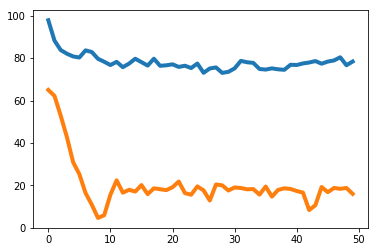

In [27]:
%pylab inline
import pylab

fl=po.get_fields(["Total_Score",
                  "CrossLinkingMassSpectrometryRestraint_Data_Score_Chen",
                  "CrossLinkingMassSpectrometryRestraint_Distance_|Trnka|103.1|Rpb1|1|Rpb1|343|0|PSI|"])

pylab.plot([float(x) for x in fl["CrossLinkingMassSpectrometryRestraint_Data_Score_Chen"]])
pylab.plot([float(x) for x in fl["CrossLinkingMassSpectrometryRestraint_Distance_|Trnka|103.1|Rpb1|1|Rpb1|343|0|PSI|"]])

Additionally, with a little bit of coding, we can draw the box-plot for all crosslink distances

/c7/home/rpellari/imp-project/IMP-2.9.0/imp-fast/lib/IMP/pmi/output.py:1665: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/c7/shared/Python/2.7.15/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/c7/shared/Python/2.7.15/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/c7/shared/Python/2.7.15/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/c7/shared/Python/2.7.15/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/c7/shared/Python/2.7.15/lib/python2.7/site-packages/ipykernel/kernelap

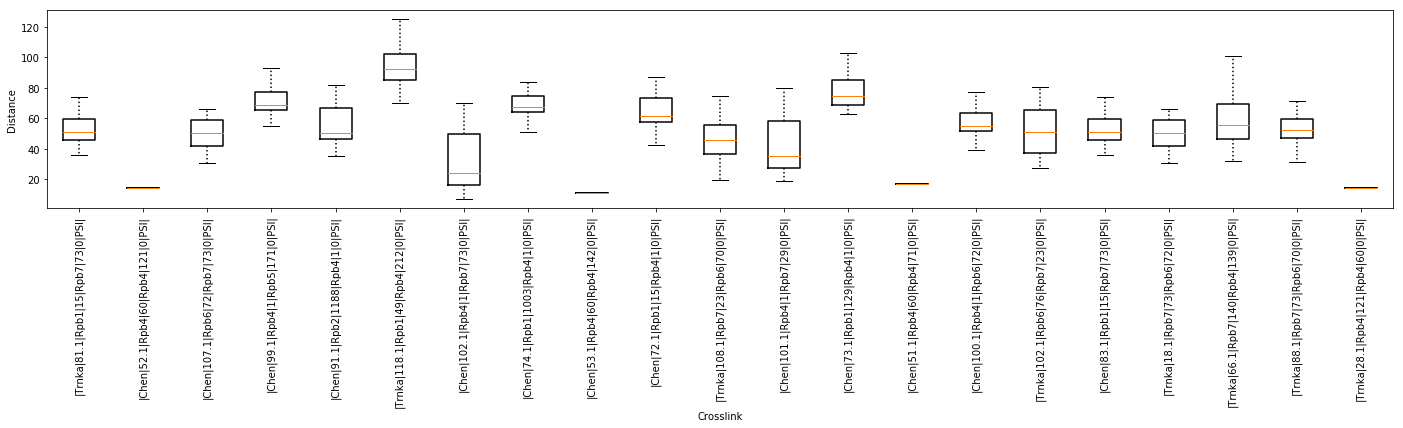

In [28]:
ks=[]
for k in po.get_keys():
    if "Distance" in k and ("Rpb7" in  k or "Rpb4" in k): ks.append(k)
        
fls=po.get_fields(ks)
values=[]
labels=[]
positions=[]
n=0
for k in fls:
        n+=1
        values.append([float(x) for x in fls[k]])
        labels.append(k.split("_")[2])
        positions.append(n)

IMP.pmi.output.plot_fields_box_plots("CrosslinkDistances",values,
                                     positions,valuename="Distance",
                                     positionname="Crosslink",
                                     xlabels=labels)

## Stage 4 - Analysis Part 1 <a name="Analysis_Part_1_2"></a>

In the analysis stage we cluster (group by similarity) the sampled models to determine high-probability configurations. Comparing clusters may indicate that there are multiple acceptable configurations given the data. 

### Precomputed results <a name="Precomputed_Results_3"></a>

A long modeling run was precomputed and analyzed. You can [download](ftp://salilab.org/tutorials/imp/rnapolii/results.tar.gz) it from our website, and you can [download](ftp://salilab.org/tutorials/imp/rnapolii/analysis.tar.gz) the corresponding analysis.

### Clustering top models using `clustering.py` <a name="Clustering_3"></a>
The `clustering.py` script, found in the `rnapolii/analysis` directory, calls the [AnalysisReplicaExchange0](https://integrativemodeling.org/nightly/doc/ref/classIMP_1_1pmi_1_1macros_1_1AnalysisReplicaExchange0.html) macro, which finds top-scoring models, extracts coordinates, runs k-means clustering, and does basic cluster analysis including creating localization densities for each subunit. The script generates a directory containing as many subdirectories as the number of clusters queried. Each subdirectory contains an RMF and a PDB for each structure extracted, a stat file, and the localization densities.

We can choose the number of clusters, the subunits we want to use to calculate the RMSD, and the number of good-scoring solutions to include. These options are at the top of the script: 

In [29]:
# load libraries
import matplotlib as mpl
mpl.use('Agg')

import IMP
import IMP.pmi
import IMP.pmi.macros
import sys,os

# most common settings
num_clusters = 1
num_top_models = 5
merge_directories = ["./"]   #in this ipython notebook we use the local directory to store the models
prefiltervalue = 1000.0
out_dir = "kmeans_%i_%i/" %(num_top_models,num_clusters)

/c7/shared/Python/2.7.15/lib/python2.7/site-packages/ipykernel_launcher.py:3: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/c7/shared/Python/2.7.15/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/c7/shared/Python/2.7.15/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/c7/shared/Python/2.7.15/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/c7/shared/Python/2.7.15/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/c7/shared/Python/2.7.15/lib/python2.7/site-packages/ipykernel/kernela

Finally, we start the clustering. Most of the options were chosen earlier in the script.

If we perform sampling multiple times separately, they can all be analyzed at the same time by appending to `merge_directories`. The prefiltervalue removes all models scoring below this value (meaning, they aren't clustered) which can be helpful to reduce the problem size.

Create the analysis macro and pass it basic information (it will search for stat files):

In [30]:
# initialize the macro
mc=IMP.pmi.macros.AnalysisReplicaExchange0(m,
                                           merge_directories=merge_directories)

These are features that are kept around (and moved to the cluster stat files):

In [31]:
# fields that have to be extracted for the stat file
feature_list=["ISDCrossLinkMS_Distance_intrarb",
              "ISDCrossLinkMS_Distance_interrb",
              "ISDCrossLinkMS_Data_Score",
              "GaussianEMRestraint_None",
              "SimplifiedModel_Linker_Score_None",
              "ISDCrossLinkMS_Psi",
              "ISDCrossLinkMS_Sigma"]

Now we specify the subunits (or groups or fractions of subunits) for which we want to create density localization maps. `density_names` is a dictionary, where the keys are convenient names like "Rpb1-CTD" and the values are a list of selections. The selection items can either be a domain name like "Rpb1" or a list like (200,300,"Rpb1") which means residues 200-300 of component Rpb1. This enables the user to combine multiple selections for a single density calculation.

In [32]:
# Dictionary of densities to be calculated
# the key is the name of the file and the value is the selection
# example: {"med17-CTD":[(200,300,"med17")],"med17-CTD.med14":[(200,300,"med17"),"med14"]   }
density_names = {"Rpb4":["Rpb4"],
               "Rpb7":["Rpb7"]}

Next, we specify the components used in calculating the RMSD between models. All selections here are used together for a single RMSD calculation between two models. The format is the same as `density_names`. One use case is when only a subset of the system is actually being sampled (with the rest kept static). Note that unless you provide something to `align_names` (see below), no alignment is done before calculating RMSD.

In [33]:
# list of component names needed to calculate the RMSD for the clustering
rmsd_names = {"Rpb4":"Rpb4",
              "Rpb7":"Rpb7"}

Next, we specify components used for structural alignment. This is needed in case there is no absolute reference frame (like an EM map). The format is the same as density and RMSD. In this case we use `None` because of the EM map.

In [34]:
# components used for structural alignment
align_names = None # (None because EM provides reference frame)

Finally, we start the clustering. Most of the options were chosen earlier in the script.

In [35]:
mc.clustering(prefiltervalue=prefiltervalue,                   # prefilter the models by score
              number_of_best_scoring_models=num_top_models,    # number of models to be clustered
              alignment_components=None,                       # list of proteins you want to use for structural alignment
              rmsd_calculation_components=rmsd_names,          # list of proteins used to calculated the rmsd
              distance_matrix_file="distance.rawmatrix.pkl",   # save the distance matrix
              outputdir=out_dir,                               # location for clustering results
              feature_keys=feature_list,                       # extract these fields from the stat file
              load_distance_matrix_file=False,                 # skip the matrix calculation and read the precalculated matrix
              display_plot=True,                               # display the heat map plot of the distance matrix
              exit_after_display=False,                        # exit after having displayed the distance matrix plot
              get_every=1,                                     # skip structures for faster computation
              number_of_clusters=num_clusters,                 # number of clusters to be used by kmeans algorithm
              voxel_size=3.0,                                  # voxel size of the mrc files
              density_custom_ranges=density_names)             # setup the list of densities to be calculated

getting data from file ./output/stat.0.out
getting coordinates for frame 0 rmf file /c7/home/rpellari/imp-project/IMP-2.9.0/imp_tutorial/doc/output/rmfs/0.rmf3
getting coordinates for frame 29 rmf file /c7/home/rpellari/imp-project/IMP-2.9.0/imp_tutorial/doc/output/rmfs/0.rmf3
getting coordinates for frame 29 rmf file /c7/home/rpellari/imp-project/IMP-2.9.0/imp_tutorial/doc/output/rmfs/0.rmf3
linking hierarchies for frame 28 rmf file /c7/home/rpellari/imp-project/IMP-2.9.0/imp_tutorial/doc/output/rmfs/0.rmf3
linking hierarchies for frame 44 rmf file /c7/home/rpellari/imp-project/IMP-2.9.0/imp_tutorial/doc/output/rmfs/0.rmf3
linking hierarchies for frame 25 rmf file /c7/home/rpellari/imp-project/IMP-2.9.0/imp_tutorial/doc/output/rmfs/0.rmf3
linking hierarchies for frame 34 rmf file /c7/home/rpellari/imp-project/IMP-2.9.0/imp_tutorial/doc/output/rmfs/0.rmf3
setup clustering class
Global calculating the distance matrix
process 0 assigned with 10 pairs


/c7/home/rpellari/imp-project/IMP-2.9.0/imp-fast/lib/IMP/pmi/analysis.py:338: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/c7/shared/Python/2.7.15/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/c7/shared/Python/2.7.15/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/c7/shared/Python/2.7.15/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/c7/shared/Python/2.7.15/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/c7/shared/Python/2.7.15/lib/python2.7/site-packages/ipykernel/kernela

[0]
rank 0 
cluster 0 
cluster label 0 
['/c7/home/rpellari/imp-project/IMP-2.9.0/imp_tutorial/doc/output/rmfs/0.rmf3|44', '/c7/home/rpellari/imp-project/IMP-2.9.0/imp_tutorial/doc/output/rmfs/0.rmf3|34', '/c7/home/rpellari/imp-project/IMP-2.9.0/imp_tutorial/doc/output/rmfs/0.rmf3|25', '/c7/home/rpellari/imp-project/IMP-2.9.0/imp_tutorial/doc/output/rmfs/0.rmf3|28', '/c7/home/rpellari/imp-project/IMP-2.9.0/imp_tutorial/doc/output/rmfs/0.rmf3|29']
getting coordinates for frame 44 rmf file /c7/home/rpellari/imp-project/IMP-2.9.0/imp_tutorial/doc/output/rmfs/0.rmf3
linking hierarchies for frame 34 rmf file /c7/home/rpellari/imp-project/IMP-2.9.0/imp_tutorial/doc/output/rmfs/0.rmf3
linking hierarchies for frame 25 rmf file /c7/home/rpellari/imp-project/IMP-2.9.0/imp_tutorial/doc/output/rmfs/0.rmf3
linking hierarchies for frame 28 rmf file /c7/home/rpellari/imp-project/IMP-2.9.0/imp_tutorial/doc/output/rmfs/0.rmf3
linking hierarchies for frame 29 rmf file /c7/home/rpellari/imp-project/IMP-2

### Clustering Results <a name="Clustering_Results_3"></a>
Run the clustering script by changing into the `rnapolii/analysis` directory and then running:

```
python clustering.py
```

If you ran `modeling.py` with the `--test` option, it is a good idea to give the `--test` option to `clustering.py` as well (this increases the prefilter value; none of the 50 test models generated may be good enough to satisfy the default prefilter value). With such minimal sampling, the quality of the results is unlikely to be high; you can download [the precalculated results](ftp://salilab.org/tutorials/imp/rnapolii/results.tar.gz) and the [resulting clusters](ftp://salilab.org/tutorials/imp/rnapolii/analysis.tar.gz) from our website.

First we can look through the cluster results directory to see the output (see example below). The clustering directory contains the distance matrix plot (described below) and a folder for each cluster. Within the cluster folder are PDB and RMF files containing members of each cluster, localization densities for requested components (the `.mrc` files), and a stat file output (with one entry for each cluster member). All RMF, PDB, and MRC files should be viewable in Chimera. 

<img src="files/images/rnapolii_cluster_files.png" alt="clustering files" />

Here is an example modeling result (from the provided files, `cluster.1/4.rmf3`, the cluster center):

<img src="files/images/rnapolii_result.png" alt="Example result" width="600px" />

Next we can examine the plots outputted by the clustering script. The plots are output to a single file (`dist_matrix.pdf`) in the clustering directory. The first plot is the distance matrix of the models after being grouped into clusters. The matrix should show the requested number of clusters with much lower within-cluster than between-cluster distance. If this is not the case, then perhaps too many clusters were chosen.

The second plot is a dendrogram, basically showing the distance matrix in a hierarchical way. Each vertical line from the bottom is a model, and the horizontal lines show the RMSD agreement between models. Sometimes the dendrogram can indicate a natural number of clusters, which can help determine the correct number to use. Here is the result from using 2 clusters on the example results:

<img src="files/images/rnapolii_dist_matrix.png" alt="Distance matrix and dendrogram" width="600px" />

Next can examine the localization densities of a cluster. These can give a qualitative idea of the precision of a cluster. Below we show results from `cluster.1` in the provided results: the native structure without Rpb4/7 (in blue), the target density map (in mesh), and the localization densities (Rpb4 in cyan, Rpb7 in purple). The localizations are quite narrow and close to the native solution:

<img src="files/images/rnapolii_localization.png" alt="Localization densities" width="600px" />


## Stage 4 - Analysis Part 2 <a name="Analysis_Part_2_2"></a>

### Post-clustering analysis <a name="Post_clustering_analsysis_3"></a>
In this stage we perform post-clustering analysis.  Here, we will perform calculations for:

* **Cluster Precision**: Determining the within-group precision and between-group similarity via RMSD
* **Cluster Accuracy**: Fit of the calculated clusters to the true (known) solution
* **Sampling Exhaustiveness**: Qualitative and quantitative measurement of sampling completeness

### Cluster Precision (`precision_rmsf.py`) <a name="Cluster_Precision_3"></a>

The `precision_rmsf.py` script can be used to determine the within- and between-cluster RMSD (i.e., precision). To run, use:

```
python precision_rmsf.py
```

It will generate `precision.*.*.out` files in the `kmeans*` subdirectory containing precision information in text format, while in each cluster directory it generates `.pdf` files showing the within-cluster residue mean square fluctuation. In a similar way to earlier scripts, subsets of the structure can be selected for the calculation - in this case, we select the Rpb4 and Rpb7 subunits.

In [36]:
import glob
root_cluster_directory="./kmeans_5_1"

# choose components for the precision calculation
# key is the named precision item
# value is a list of selection tuples [either "domain_name" or (start,stop,"domain_name") ]
selections={"Rpb4":["Rpb4"],
            "Rpb7":["Rpb7"],
            "Rpb4_Rpb7":["Rpb4","Rpb7"]}

The script then sets up a model and [Precision](@ref IMP::pmi::analysis::Precision) object for the given `selections` at the desired resolution for computation of the precision (`resolution=1` specifies at the residue level).

In [37]:
# setup Precision calculator
pr = IMP.pmi.analysis.Precision(m,resolution=1,selection_dictionary=selections)
pr.set_precision_style('pairwise_rmsd')

Next, lists of structures are created that will be passed to the `Precision` object. `rmf_list` references the specific `.rmf` file, which with those `frame_list` is used to reference a particular frame in that `.rmf` to use (in this case, the only frame in the rmf, 0).

In [38]:
# gather the RMF filenames for each cluster
rmf_list=[]
frame_list=[]
cluster_dirs=glob.glob(root_cluster_directory+'/cluster.*/')

for d in cluster_dirs:
    rmf_list.append(glob.glob(d+'/*.rmf3'))
    frame_list.append([0]*len(rmf_list[-1]))

The list of frames and rmfs are added to the precision object

In [39]:
# add them to the Precision object
for rmfs,frames,cdir in zip(rmf_list,frame_list,cluster_dirs):
    pr.add_structures(zip(rmfs,frames),cdir)

getting coordinates for frame 0 rmf file ./kmeans_5_1/cluster.0/2.rmf3
linking coordinates for frame 0 rmf file ./kmeans_5_1/cluster.0/3.rmf3
linking coordinates for frame 0 rmf file ./kmeans_5_1/cluster.0/1.rmf3
linking coordinates for frame 0 rmf file ./kmeans_5_1/cluster.0/4.rmf3
linking coordinates for frame 0 rmf file ./kmeans_5_1/cluster.0/0.rmf3


Self-precision and inter-cluster precision is then calculated, using the `rmf_list` and the output is placed in `root_cluster_directory`.

In [40]:
import itertools
# calculate intra-cluster and inter-cluster precision
print("calculating precision")
for clus1,clus2 in itertools.combinations_with_replacement(range(len(rmf_list)),2):
    pr.get_precision(cluster_dirs[clus1],
                     cluster_dirs[clus2],
                     root_cluster_directory+"/precision."+str(clus1)+"."+str(clus2)+".out")

calculating precision


Finally, the RMSFs for each residue in the analyzed components are calculated and stored in `root_cluster_directory/rmsf.COMPONENT_NAME.dat`


In [41]:
# compute residue mean-square fluctuation (RMSF)
for d in cluster_dirs:
    pr.get_rmsf(structure_set_name=d,outdir=d)

/c7/home/rpellari/imp-project/IMP-2.9.0/imp-fast/lib/IMP/pmi/output.py:1702: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/c7/shared/Python/2.7.15/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/c7/shared/Python/2.7.15/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/c7/shared/Python/2.7.15/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/c7/shared/Python/2.7.15/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/c7/shared/Python/2.7.15/lib/python2.7/site-packages/ipykernel/kernelap

<img src="files/images/rnapolii_rmsf.Rpb7.png" width="500px" alt="residue root mean square fluctuations calculated on a cluster of structures" />

### Accuracy evaluation (`accuracy.py`) <a name="Accuracy_3"></a>
We have provided a script to evaluate the accuracy of a model against a native configuration. When run, it will enumerate the structures in the first cluster and print the average and minimum distance between those structures and a given reference model. This is useful for benchmarking (but obviously is of no use when we don't know the 'real' structure).

To run, use

```
python accuracy.py
```

First, identify the reference structure and list of `.rmf` structures to use in calculation

In [42]:
# common settings
reference_rmf = "../rnapolii/data/native.rmf3"
test_mode = False                             # run on every 10 rmf files
rmfs = glob.glob('kmeans_*_1/cluster.0/*.rmf3') # list of the RMFS to calculate on

The components that will be compared to reference must be explicitly enumerated in `selections`

In [43]:
# choose components for the precision calculation
# key is the named precision item
# value is a list of selection tuples [either "domain_name" or (start,stop,"domain_name") ]
selections = {"Rpb4":["Rpb4"],
              "Rpb7":["Rpb7"],
              "Rpb4_Rpb7":["Rpb4","Rpb7"]}

Initialize a `Precision` class object and add the `selections`.  Then add the list of `.rmf` structures 

In [44]:
# setup Precision calculator
frames=[0]*len(rmfs)
pr=IMP.pmi.analysis.Precision(m,selection_dictionary=selections)
pr.set_precision_style('pairwise_rmsd')
pr.add_structures(zip(rmfs,frames),"ALL")

getting coordinates for frame 0 rmf file kmeans_5_1/cluster.0/2.rmf3
linking coordinates for frame 0 rmf file kmeans_5_1/cluster.0/3.rmf3
linking coordinates for frame 0 rmf file kmeans_5_1/cluster.0/1.rmf3
linking coordinates for frame 0 rmf file kmeans_5_1/cluster.0/4.rmf3
linking coordinates for frame 0 rmf file kmeans_5_1/cluster.0/0.rmf3


Average to the reference structure in angstroms for each component in `selections` is then calculated and outputted to the screen.


In [45]:
# calculate average distance to the reference file
pr.set_reference_structure(reference_rmf,0)
pr.get_average_distance_wrt_reference_structure("ALL")

linking coordinates for frame 0 rmf file ../rnapolii/data/native.rmf3
Rpb4 average distance 60.9442558705 minimum distance 54.7148658204 nframes 5
All average distance 35.0481008854 minimum distance 34.4369512019 nframes 5
Rpb7 average distance 35.5420638573 minimum distance 32.7200648959 nframes 5
Rpb4_Rpb7 average distance 50.2085635885 minimum distance 45.3942923206 nframes 5


{'All': {'average_distance': 35.04810088539334,
  'minimum_distance': 34.43695120186099},
 'Rpb4': {'average_distance': 60.94425587048052,
  'minimum_distance': 54.71486582035667},
 'Rpb4_Rpb7': {'average_distance': 50.20856358854436,
  'minimum_distance': 45.39429232056408},
 'Rpb7': {'average_distance': 35.54206385729117,
  'minimum_distance': 32.72006489585721}}










The output of this analysis will be printed in the terminal. For instance,
you will get something like:

    Rpb4 average distance 20.7402052384 minimum distance 11.9324734377
    All average distance 5.05387877292 minimum distance 3.4664144466
    Rpb7 average distance 10.5032807663 minimum distance 5.06599370365
    Rpb4_Rpb7 average distance 16.0757238511 minimum distance 9.63785403195

The average distance is the average RMSD of each model in the cluster with respect to the reference structure. The program prints values for all selections (`Rpb4`, `Rpb7` and `Rpb4_Rpb7`) and automatically for all the complex (`All`)

### Sampling Exhaustiveness <a name="Sampling_Exhaustiveness_3"></a>
We can also determine sampling exhaustiveness by dividing the models into multiple sets, performing clustering on each set separately, and comparing the clusters. This step is left as an exercise to the reader. To aid with splitting the data, we have added the optional keyword `first_and_last_frames` to the IMP::pmi::macros::AnalysisReplicaExchange0::clustering() method.
If you set this keyword to a tuple (values are percentages, e.g. [0,0.5]), it will only analyze that fraction of the data. Some things you can try:
* cluster two subsets of the data
* qualitative analysis: look at the localization densities - they should be similar for the two subsets
* quantitative analysis: combine the cluster results into one folder (rename as needed) and call `precision_rmsf.py`, which will automatically compute cross-precision for the clusters. 

If the sampling is exhaustive, then similar clusters should be obtained from each independent set, and the inter-cluster precision between two equivalent clusters should be very low (that is, there should be a 1:1 correspondence between the two sets of clusters, though the ordering may be different).